<a href="https://colab.research.google.com/github/robiulislam1999/CSE718/blob/main/chap07_file01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Examples**

Limits to Growth

In [ ]:
# download modsim.py if necessary

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'modsim.py')
# import functions from modsim
from modsim import *

Downloaded modsim.py


In [ ]:
download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/data/World_population_estimates.html')

Downloaded World_population_estimates.html


In [ ]:
from pandas import read_html

filename = 'World_population_estimates.html'
tables = read_html(filename, header=0, index_col=0, decimal='M')
table2 = tables[2]
table2.columns = ['census', 'prb', 'un', 'maddison',
                  'hyde', 'tanton', 'biraben', 'mj',
                  'thomlinson', 'durand', 'clark']

In [ ]:
un = table2.un / 1e9
census = table2.census / 1e9

In [ ]:
download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'chap06.py')

Downloaded chap06.py


In [ ]:
from chap06 import run_simulation

def plot_estimates():
    census.plot(style=':', label='US Census')
    un.plot(style='--', label='UN DESA')
    decorate(xlabel='Year',
             ylabel='World population (billions)')

Quadratic Growth

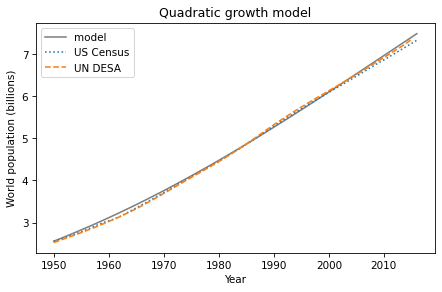

In [ ]:
def growth_func_quad(t, pop, system):
    return system.alpha * pop + system.beta * pop**2
t_0 = census.index[0]
p_0 = census[t_0]
t_end = census.index[-1]
system = System(t_0=t_0,
                p_0=p_0,
                t_end=t_end)
system.alpha = 25 / 1000
system.beta = -1.8 / 1000
results = run_simulation(system, growth_func_quad)
results.plot(color='gray', label='model')
plot_estimates()
decorate(title='Quadratic growth model')

Net Growth

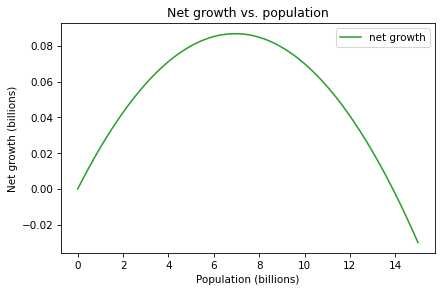

In [ ]:
from numpy import linspace
pop_array = linspace(0, 15, 101)
growth_array = (system.alpha * pop_array +
                system.beta * pop_array**2)
from matplotlib.pyplot import plot
plot(pop_array, growth_array, label='net growth', color='C2')
decorate(xlabel='Population (billions)',
         ylabel='Net growth (billions)',
         title='Net growth vs. population')

Finding Equilibrium

In [ ]:
-system.alpha / system.beta

13.88888888888889

Dysfunctions

In [ ]:
def carrying_capacity(system):
    K = -system.alpha / system.beta
    return K

sys1 = System(alpha=0.025, beta=-0.0018)
pop = carrying_capacity(sys1)
print(pop)

13.88888888888889


In [ ]:
def carrying_capacity():
    K = -sys1.alpha / sys1.beta
    return K

sys1 = System(alpha=0.025, beta=-0.0018)
pop = carrying_capacity()
print(pop)

13.88888888888889


In [ ]:
# WRONG
def carrying_capacity(system):
    system = System(alpha=0.025, beta=-0.0018)
    K = -system.alpha / system.beta
    return K

sys1 = System(alpha=0.03, beta=-0.002)
pop = carrying_capacity(sys1)
print(pop)

13.88888888888889


In [ ]:
# WRONG
def carrying_capacity(system):
    K = -system.alpha / system.beta

sys1 = System(alpha=0.025, beta=-0.0018)
pop = carrying_capacity(sys1)
print(pop)

None


**Exercises**

Exercise 1

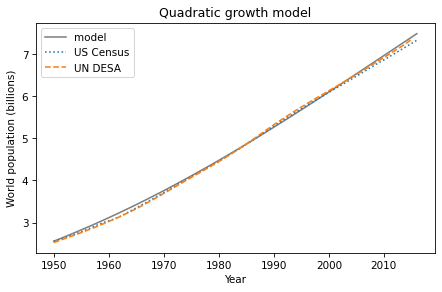

In [ ]:
system.r = system.alpha
system.k = -system.alpha/system.beta
def growth_func_quad_2(t, pop, system):
    return system.r * pop *(1-pop/system.k)
results = run_simulation(system, growth_func_quad_2)
results.plot(color='gray', label='model')
plot_estimates()
decorate(title='Quadratic growth model')

Exercise 2

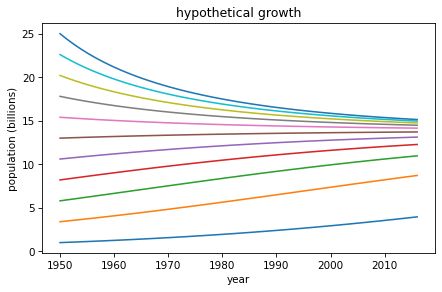

In [ ]:
p_array = linspace(1, 25, 11)
for p_0 in p_array:
    system.p_0 = p_0
    resultst = run_simulation(system, growth_func_quad)
    resultst.plot(label='_nolegend')
decorate(xlabel='year',
         ylabel='population (billions)',
         title='hypothetical growth')